# Predict survival on the Titanic

In [1]:
#import libraries for data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read train data using pandas
train = pd.read_csv('train.csv',index_col = 'PassengerId')

# Read test data using pandas
test = pd.read_csv('test.csv',index_col = 'PassengerId')

full_data = pd.concat([train.drop('Survived',axis=1),test],axis = 0,sort = False)

In [3]:
# check the first 5 rows
full_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#cheaking for null
train[train['Embarked'].isnull() == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Data Visualization

### Use heatmap to check for missing values.

In [5]:
def missing_values(data, cmap = 'viridis'):
    """
    Given the data, this function will return a graph for missing values
    
    Parameters
    ----------
    data : Pandas dataframe.
    cmap : matplotlib colormap name or object, or list of colors, optional
    The mapping from data values to color space. If not provided, the
    default is 'viridis'.
    
    """
    return sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

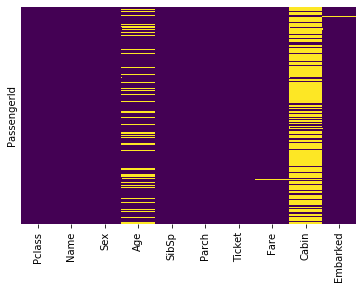

In [6]:
missing_values(full_data)

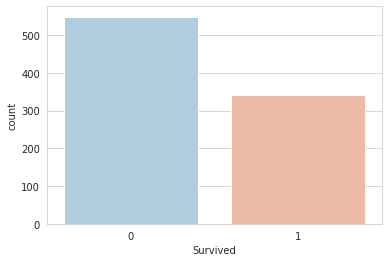

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

### Check the ratio for male and female who survived

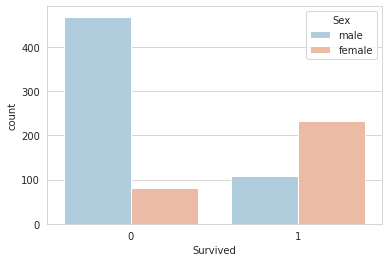

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

### In terms of class

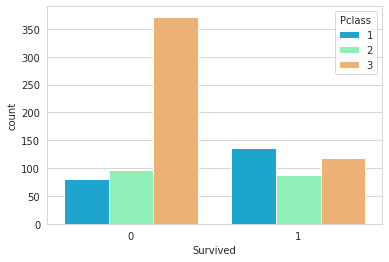

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

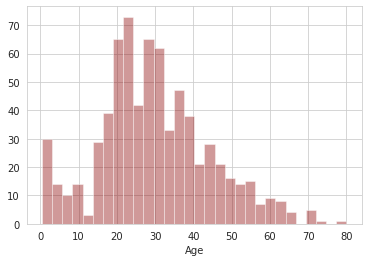

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

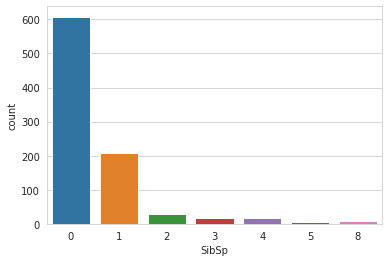

In [11]:
sns.countplot(x='SibSp',data=train)

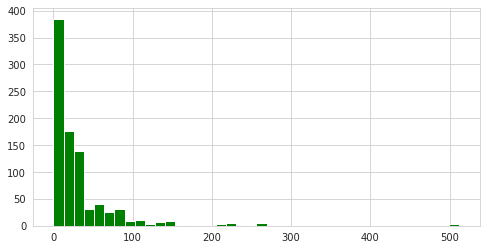

In [12]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))


### How many unique tickets are there?

In [13]:
full_data['Ticket'].nunique()

929

### Create a new feature with the titles

In [14]:
full_data['title'] = full_data['Name'].apply(lambda myString: myString[myString.find(",")+2:myString.find(".")])


In [15]:
full_data['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
Don               1
Sir               1
the Countess      1
Capt              1
Mme               1
Lady              1
Dona              1
Name: title, dtype: int64

## Data Cleaning

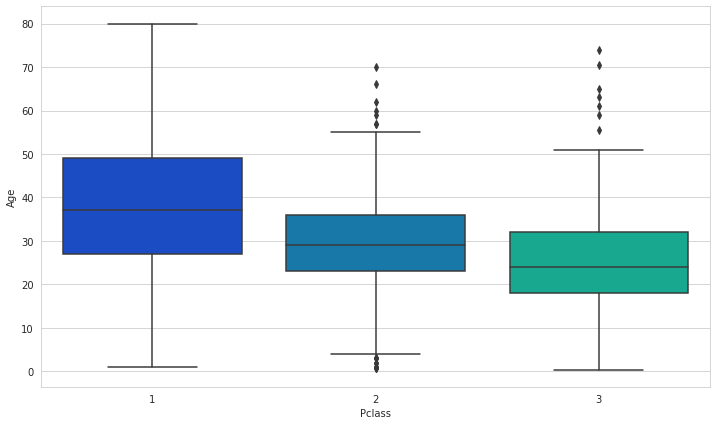

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [18]:
full_data['Age'] = full_data[['Age','Pclass']].apply(impute_age,axis=1)


### Let's check the heatmap again

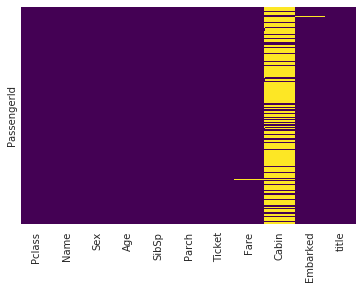

In [19]:
missing_values(full_data)

### Let's  convert categorical features to dummy variables using pandas! 

**There are so many missing values in "cabin" column, that it's better to drop it**

In [20]:
full_data.drop('Cabin',axis=1,inplace=True)


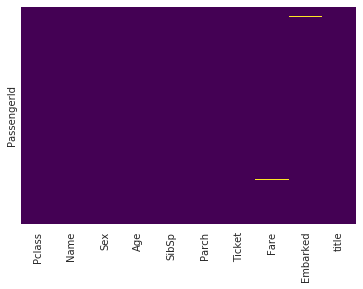

In [21]:
#checking for the missing values again
missing_values(full_data)

In [22]:
full_data[full_data['Fare'].isna() == True] = full_data['Fare'].mean()

In [23]:
full_data[full_data['Embarked'].isna() == True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
PassengerId,,,,,,,,,,
62,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,NaN,Miss
830,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,NaN,Mrs


In [24]:
sex = pd.get_dummies(full_data['Sex'],drop_first=True)
embark = pd.get_dummies(full_data['Embarked'],drop_first=True)
title = pd.get_dummies(full_data['title'],drop_first=True)

In [25]:
#drop the categorical features
full_data.drop(['Sex','Embarked','Name','Ticket','title'],axis=1,inplace=True)


In [26]:
# replace them with the nummeric features 
full_data = pd.concat([full_data,sex,embark,title],axis=1)

In [27]:
full_data.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3.0,22.0,1.0,0.0,7.2500,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1.0,38.0,1.0,0.0,71.2833,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3.0,26.0,0.0,0.0,7.9250,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1.0,35.0,1.0,0.0,53.1000,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,3.0,35.0,0.0,0.0,8.0500,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [28]:
#split train and test again
def split_data(data,nrow):
    """
    split data along the row
    
    Paranmeters
    --------------
    data : pandas dataframe
    nrow : split 
    
    Returns
    --------------
    Tuple of top and bottom part of the data
    """
    top = data.iloc[:nrow]
    bottom = data.iloc[nrow:]
    return (top,bottom)


train_new,test_new = split_data(full_data,nrow = 891)

In [29]:
train_new.shape,test.shape, full_data.shape

((891, 28), (418, 10), (1309, 28))

## Building models
**We will be testing Logistic regression and Random forest for now. More models can be used depending on the accuracy**

In [30]:
#import libraries

from sklearn.model_selection import train_test_split #for train test split
#We can check precision,recall,f1-score using classification report!
from sklearn.metrics import classification_report,accuracy_score

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Train Test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_new, 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=142)


In [32]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
665,3.0,20.0,1.0,0.0,7.9250,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
576,3.0,19.0,0.0,0.0,14.5000,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
584,1.0,36.0,0.0,0.0,40.1250,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
740,3.0,24.0,0.0,0.0,7.8958,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
244,3.0,22.0,0.0,0.0,7.1250,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/ajana/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:

predict_log = logmodel.predict(X_test)

In [35]:
print(classification_report(y_test,predict_log))
print (accuracy_score(y_test,predict_log))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       167
           1       0.82      0.74      0.78       101

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

0.8395522388059702


In [81]:
y_train = np.asarray(y_train).ravel()
regmodel = RandomForestClassifier(n_estimators=50,max_features='sqrt', min_samples_split=0.1)
regmodel.fit(X_train,y_train)
predict_reg = regmodel.predict(X_test)

In [82]:
print(classification_report(y_test,predict_reg))
print (accuracy_score(y_test,predict_reg))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       167
           1       0.80      0.74      0.77       101

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

0.832089552238806


In [83]:
predict_final = regmodel.predict(test_new)

In [85]:
submission = pd.DataFrame(
    { 
        'PassengerId': test_new.index, 
        'Survived': predict_final
    }
)
submission.to_csv("submission_final.csv", index=False)